In [1]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

from pickle import dump
from pickle import load

### IV. Data Visualization
<p>
To better understand the trends observed in the extracted features, I study the statistics of these features such as their probability density function and their correlation with the class label (whether domain is legitimate or generated algorithmically), and add visualsCHECK!!
</p>

In [2]:
df_final = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/Final Project/Code/DGA-Detection-project2/data/processed/dga_features_final.csv')
df_final.head()

,isDGA,host,tld,d_length,unique_char_count,unique_letter_count,unique_digit_count,letter_ratio,digit_ratio,unique_letter_ratio,unique_digit_ratio,special_char_ratio,consonant_ratio,vowel_ratio,long_consonant_str,long_vowel_str,long_number_str,entropy,ngrams
0,1,6xzxsw3sokvg1tc752y1a6p0af,com,26,21,14,7,0.653846,0.346154,0.666667,0.333333,0.0,0.538462,0.115385,5,1,3,4.315824,390.462051
1,1,glbtlxwwhbnpxs,ru,14,10,10,0,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,14,0,0,3.235926,1133.379121
2,1,xxmamopyipbfpk,ru,14,10,10,0,1.000000,0.000000,1.000000,0.000000,0.0,0.785714,0.214286,5,1,0,3.182006,1005.406593
3,1,zfd5szpi18i85wj9uy13l69rg,net,25,19,13,6,0.600000,0.400000,0.684211,0.315789,0.0,0.480000,0.120000,3,1,2,4.163856,382.083333
4,1,jpqftymiuver,ru,12,12,12,0,1.000000,0.000000,1.000000,0.000000,0.0,0.750000,0.250000,7,2,0,3.584963,1477.137879


In [3]:
df_final.describe()

,isDGA,d_length,unique_char_count,unique_letter_count,unique_digit_count,letter_ratio,digit_ratio,unique_letter_ratio,unique_digit_ratio,special_char_ratio,consonant_ratio,vowel_ratio,long_consonant_str,long_vowel_str,long_number_str,entropy,ngrams
count,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000,159998.000000
mean,0.500006,13.537732,10.085595,9.269322,0.772747,0.939079,0.056592,0.942154,0.052751,0.004085,0.658907,0.280172,4.222772,1.384192,0.439449,3.120217,1149.408172
std,0.500002,6.602173,4.060613,3.207862,1.983631,0.145329,0.144541,0.136930,0.135697,0.020300,0.158920,0.143986,2.999987,0.650341,1.195641,0.579903,495.036259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
25%,0.000000,9.000000,7.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.555556,0.160000,2.000000,1.000000,0.000000,2.750000,818.622294
50%,1.000000,12.000000,9.000000,9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.666667,0.285714,3.000000,1.000000,0.000000,3.121928,1153.843672
75%,1.000000,15.000000,12.000000,11.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.769231,0.384615,5.000000,2.000000,0.000000,3.467720,1467.414326
max,1.000000,60.000000,32.000000,23.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.428571,1.000000,1.000000,28.000000,8.000000,20.000000,4.777317,5779.333333


<h4>A. Feature Distribution</h4>

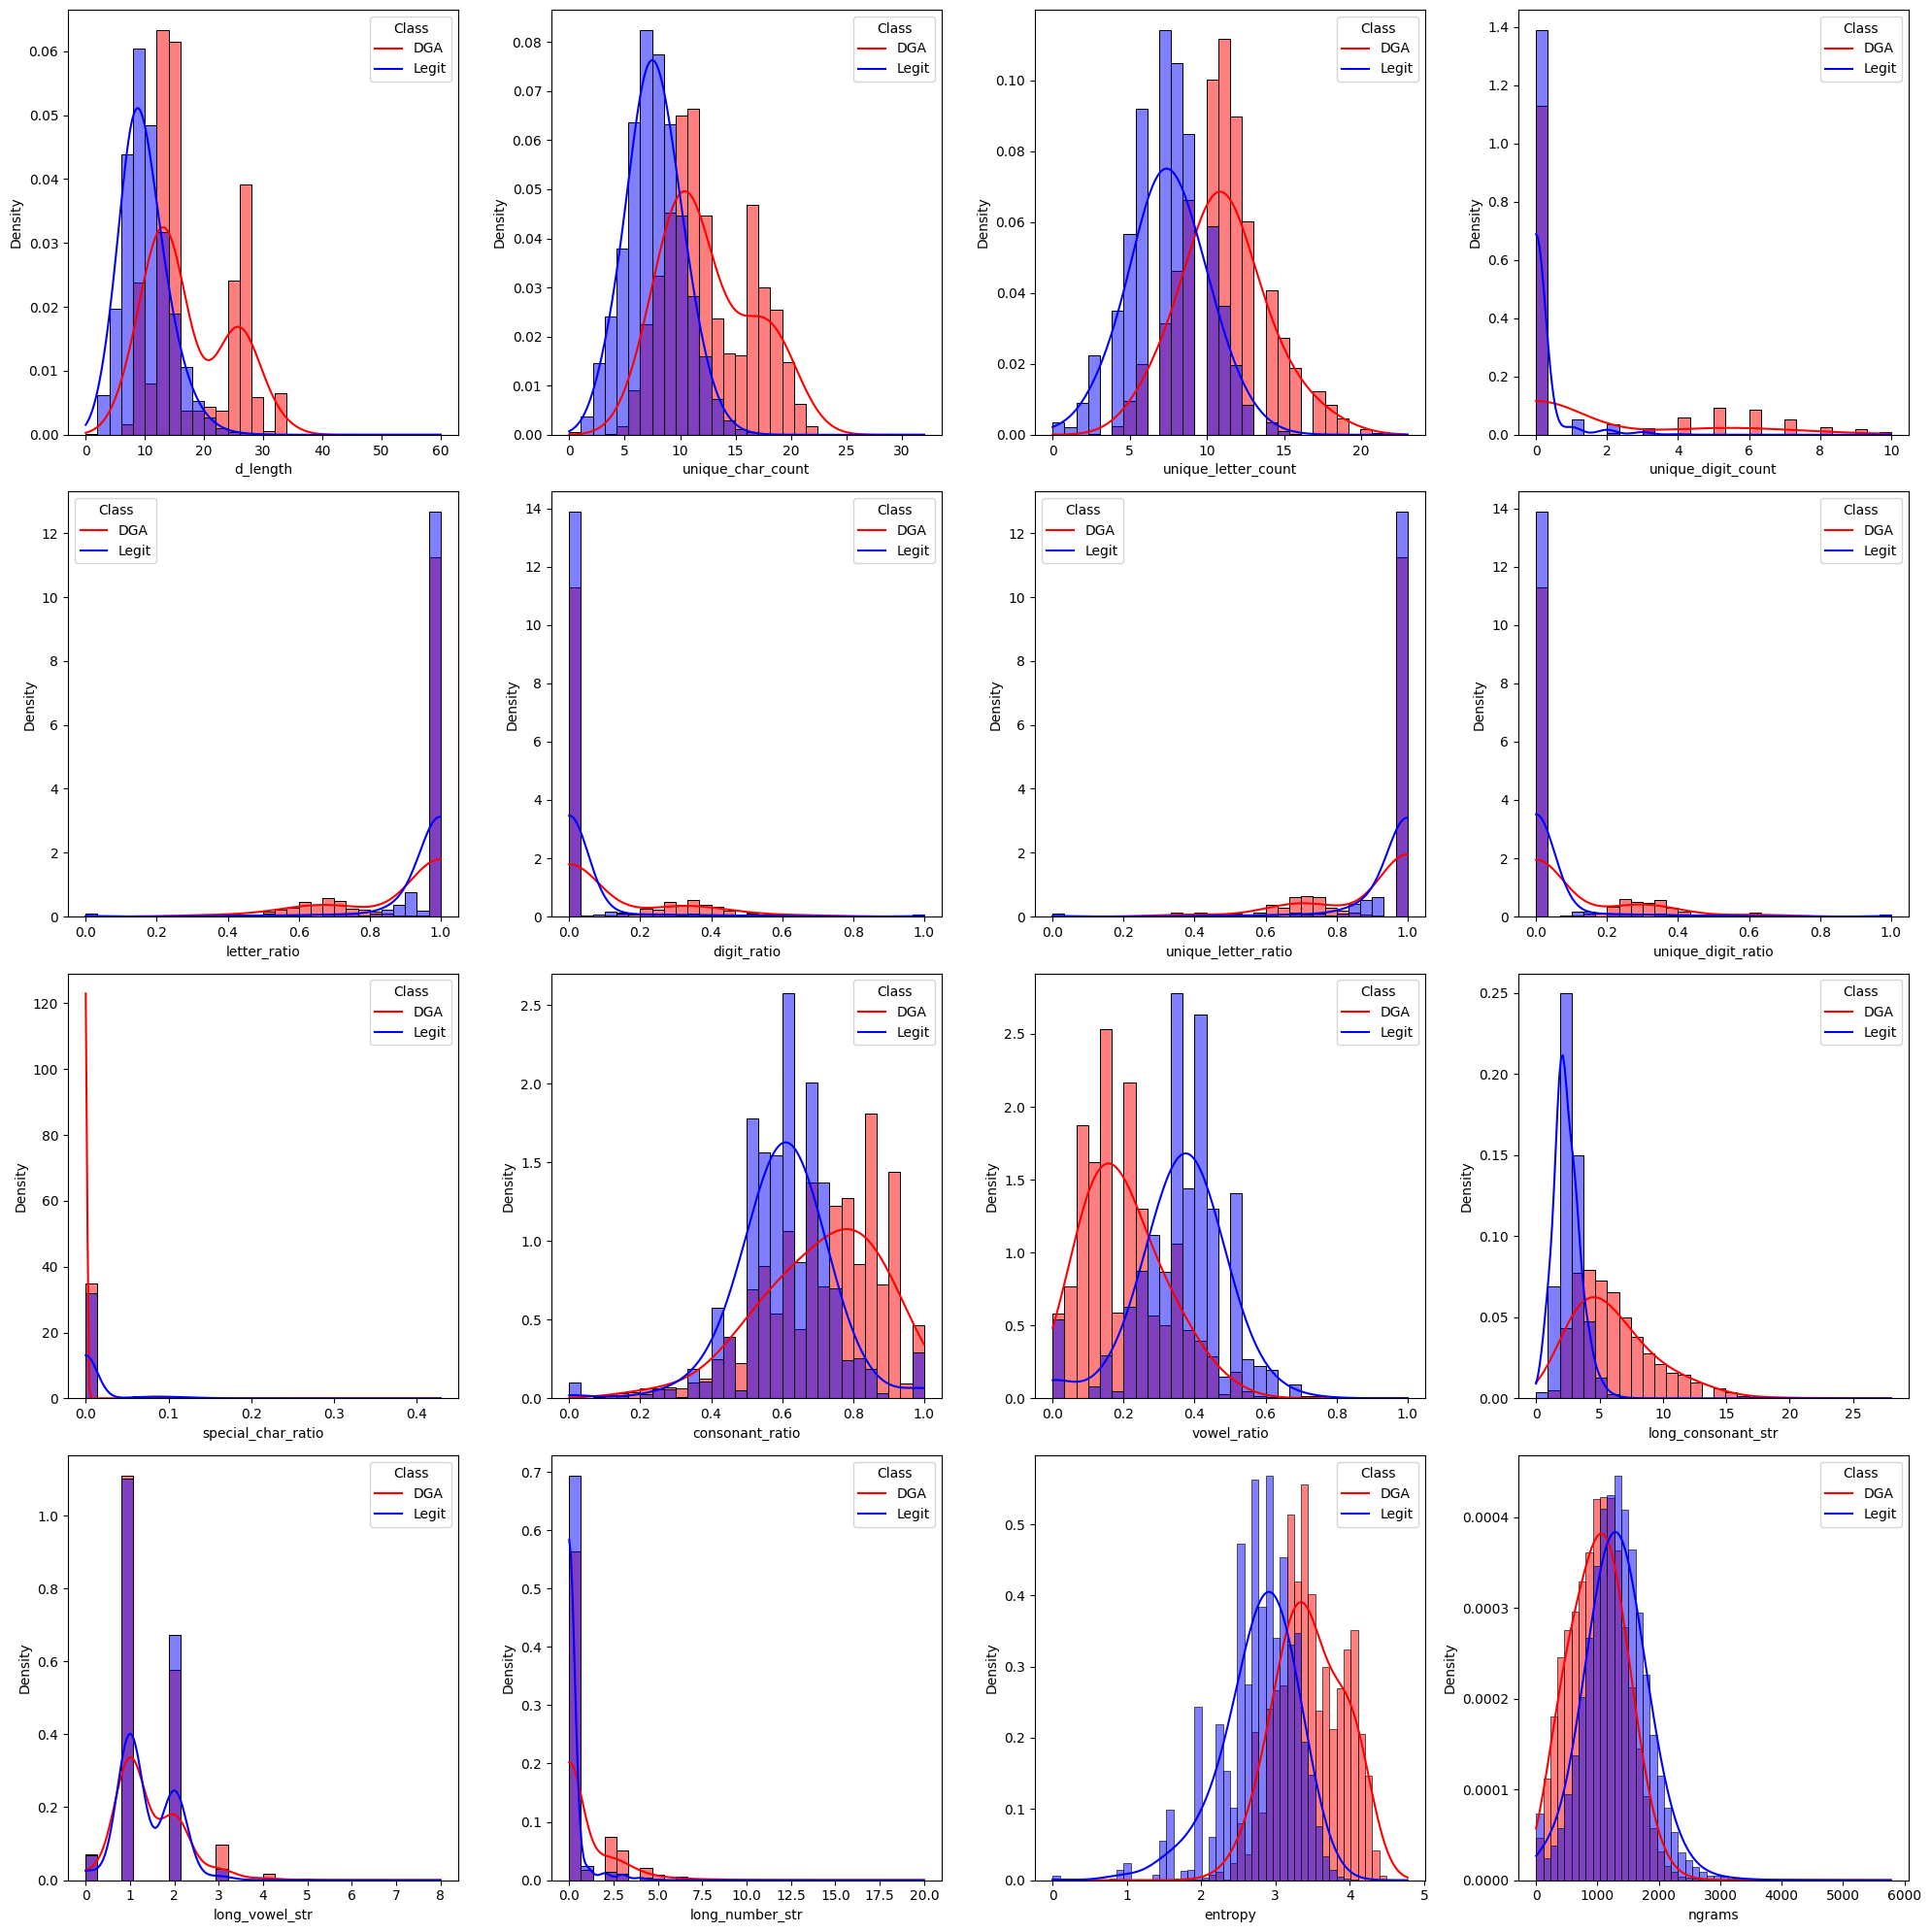

Fig. 1. Distribution of features by target variable 'isDGA'


In [4]:
features1 = ['d_length', 'unique_char_count', 'unique_letter_count', 'unique_digit_count', 'letter_ratio', 
            'digit_ratio', 'unique_letter_ratio', 'unique_digit_ratio', 'special_char_ratio', 'consonant_ratio', 
            'vowel_ratio', 'long_consonant_str', 'long_vowel_str', 'long_number_str']

features2 = ['entropy', 'ngrams']

palette = {1: 'red', 0: 'blue'}

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()  

for i, feature in enumerate(features1):
    sns.histplot(data=df_final, x=feature, hue='isDGA', kde=True, kde_kws={'bw_method': 0.5}, ax=axes[i], 
                 palette=palette, bins=30, stat='density', alpha=0.5, edgecolor='black', legend='best')
    axes[i].legend(title='Class', labels=['DGA', 'Legit'])
    
for i, feature in enumerate(features2):
    sns.histplot(data=df_final, x=feature, hue='isDGA', kde=True, kde_kws={'bw_method': 0.5}, ax=axes[i + len(features1)], 
                 palette=palette, bins=50, stat='density', alpha=0.5, edgecolor='black', legend='best')
    axes[i + len(features1)].legend(title='Class', labels=['DGA', 'Legit'])
    
plt.tight_layout()
plt.show()
print("Fig. 1. Distribution of features by target variable 'isDGA'")

<div class="alert alert-block alert-info">
<p>In <b>Figure 1</b> I plot the feature distribution to better understand the behavior and trends observed for legitimate and DGA domains:</p>
<ul>
    <li>It can be seen that legitimate domains tend to have shorter domain names and fewer number of unique characters while DGA domains tend to have more unique characters to increase the randomness of the domain name.</li>
    <li>In addition to differences in domain name length and the number of unique characters, DGA domains exhibit notable variations in the ratio of consonants to vowels, the length of consonant strings, and the overall proportion of vowels:
        <ul>
            <li>DGA domains tend to have a higher ratio of consonants to vowels compared to legitimate domains.</li>
            <li>Moreover, the analysis indicates that DGA domains feature longer strings of consecutive consonant characters.</li>
            <li>Conversely, DGA domains tend to exhibit lower vowel ratios compared to legitimate domains. </li>
        </ul>
    <li>Special characters ratio does not provide any value</li>
    <li>Also, it can be seen that legitimate domain names exhibit lower entropy while DGA-generated domains often have higher entropy.</li>
    <li>Last, the frequency of common n-grams found in legitimate domains is significantly lower in DGA domains</li>
</ul>
</div>

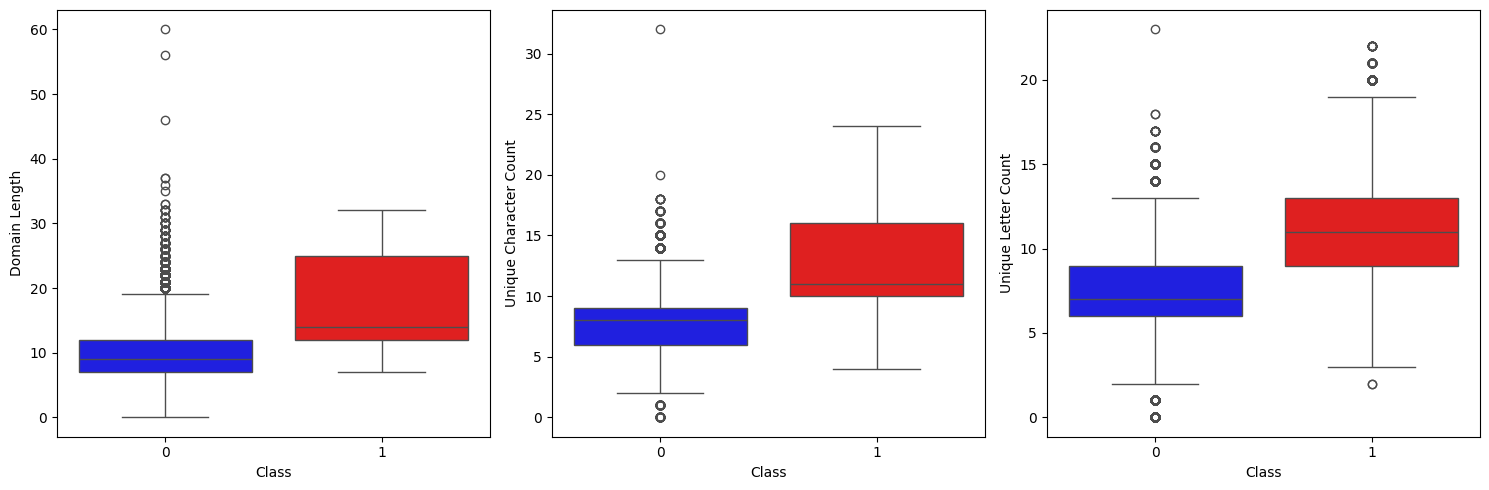

Fig. 2. Box plots for comparing domain length, unique character count, and unique letter count with the target


In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df_final, x='isDGA', y='d_length', hue='isDGA', ax=axes[0], palette=['blue', 'red'], legend=False)
sns.boxplot(data=df_final, x='isDGA', y='unique_char_count', hue='isDGA', ax=axes[1], palette=['blue', 'red'], legend=False)
sns.boxplot(data=df_final, x='isDGA', y='unique_letter_count', hue='isDGA', ax=axes[2], palette=['blue', 'red'], legend=False)

for ax in axes:
    ax.set_xlabel('Class')
    ax.set_ylabel('')

axes[0].set_ylabel('Domain Length')
axes[1].set_ylabel('Unique Character Count')
axes[2].set_ylabel('Unique Letter Count')

plt.tight_layout()
plt.show()
print("Fig. 2. Box plots for comparing domain length, unique character count, and unique letter count with the target")

<div class="alert alert-block alert-info">
In <b>Figure 2</b>, one notable observation is the difference in the length of domain names between legitimate and DGA domains. Legitimate domains tend to have shorter domain names compared to DGA domains. This can be attributed to the nature of legitimate domains, where concise and memorable names are often preferred for branding and accessibility purposes. In contrast, DGA domains often exhibit longer names as they are generated algorithmically, allowing for a wider range of permutations to evade detection and establish connections with command and control servers.<br>
<br>Furthermore, we observe variations in the number of unique characters present in domain names between legitimate and DGA domains. Legitimate domains typically have a lower number of unique characters, reflecting the use of common words, phrases, and abbreviations in domain naming conventions. On the other hand, DGA domains tend to incorporate a higher number of unique characters to increase the randomness and unpredictability of the domain names.<br>
<br>I see what can be considered an important number of outliers in the legit domains, specially in the domain length. Before deciding what to do with potential outlier, it is important to keep in mind domain-specific considerations. These domain-specific considerations play a crucial role in determining how to handle outliers. Let's display some samples and analyze them: 
</div>

In [7]:
df_final[df_final['isDGA'] == 0].sort_values('d_length', ascending=False).head(50)

,isDGA,host,tld,d_length,unique_char_count,unique_letter_count,unique_digit_count,letter_ratio,digit_ratio,unique_letter_ratio,unique_digit_ratio,special_char_ratio,consonant_ratio,vowel_ratio,long_consonant_str,long_vowel_str,long_number_str,entropy,ngrams
158153,0,3py4p4ods8eqivzcenynzr9rp7gt35bzg399i2tksesul6...,com,60,32,23,9,0.766667,0.233333,0.718750,0.281250,0.000000,0.600000,0.166667,5,1,3,4.777317,693.552770
120927,0,gay-sex-pics-porn-pictures-gay-sex-porn-gay-se...,com,56,15,14,0,0.803571,0.000000,0.933333,0.000000,0.196429,0.553571,0.250000,2,1,0,3.661056,848.387282
136393,0,article-directory-free-submission-free-content,info,46,17,16,0,0.891304,0.000000,0.941176,0.000000,0.108696,0.543478,0.347826,2,2,0,3.786816,971.686554
94332,0,sparkasse-oberlausitz-niederschlesien,de,37,18,17,0,0.945946,0.000000,0.944444,0.000000,0.054054,0.567568,0.378378,5,2,0,3.823394,1204.253289
140410,0,insearchoftheworldsmostbeautifulwoman,com,37,17,17,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.621622,0.378378,5,3,0,3.992709,1408.690319
140022,0,googleaffiliatenetwork-blog.blogspot,com,36,17,15,0,0.944444,0.000000,0.882353,0.000000,0.055556,0.583333,0.361111,3,2,0,3.808271,1381.802646
143860,0,universidaddemarketingyventasconpnl,com,35,18,18,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.657143,0.342857,4,1,0,3.932874,1474.397768
112795,0,deutsche-mittelstands-nachrichten,de,33,14,13,0,0.939394,0.000000,0.928571,0.000000,0.060606,0.666667,0.272727,4,2,0,3.631388,1066.394163
137819,0,dellbackupandrecoverycloudstorage,com,33,17,17,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.636364,0.363636,4,2,0,3.876839,1272.337406
81221,0,b117f8da23446a91387efea0e428392a,pl,32,14,5,9,0.343750,0.656250,0.357143,0.642857,0.000000,0.125000,0.218750,1,2,6,3.670959,187.941532


In [8]:
df_final[(df_final['isDGA'] == 0) & (df_final['unique_char_count'] > 15)].sort_values('unique_char_count', ascending=False).head(50)

,isDGA,host,tld,d_length,unique_char_count,unique_letter_count,unique_digit_count,letter_ratio,digit_ratio,unique_letter_ratio,unique_digit_ratio,special_char_ratio,consonant_ratio,vowel_ratio,long_consonant_str,long_vowel_str,long_number_str,entropy,ngrams
158153,0,3py4p4ods8eqivzcenynzr9rp7gt35bzg399i2tksesul6...,com,60,32,23,9,0.766667,0.233333,0.718750,0.281250,0.000000,0.600000,0.166667,5,1,3,4.777317,693.552770
152557,0,recruitment2013info.blogspot,in,28,20,15,4,0.821429,0.142857,0.750000,0.200000,0.035714,0.535714,0.285714,3,2,4,4.182006,1411.100292
143860,0,universidaddemarketingyventasconpnl,com,35,18,18,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.657143,0.342857,4,1,0,3.932874,1474.397768
101875,0,kurtlarvadisi2023.blogspot,com,26,18,14,3,0.807692,0.153846,0.777778,0.166667,0.038462,0.538462,0.269231,3,1,4,4.085055,1151.452137
94332,0,sparkasse-oberlausitz-niederschlesien,de,37,18,17,0,0.945946,0.000000,0.944444,0.000000,0.054054,0.567568,0.378378,5,2,0,3.823394,1204.253289
105732,0,gewerbeverzeichnis-deutschland,de,30,18,17,0,0.966667,0.000000,0.944444,0.000000,0.033333,0.633333,0.333333,5,2,0,3.923231,1222.578955
144709,0,ourmoderndayfairytale.blogspot,com,30,18,17,0,0.966667,0.000000,0.944444,0.000000,0.033333,0.600000,0.366667,3,2,0,3.989898,1421.289245
156139,0,congresomundialjjrperu2009,org,26,18,15,3,0.846154,0.153846,0.833333,0.166667,0.000000,0.538462,0.307692,5,2,4,4.056021,1294.258077
80849,0,theukwebdesigncompany,com,21,18,18,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.666667,0.333333,3,2,0,4.070656,1098.656809
137819,0,dellbackupandrecoverycloudstorage,com,33,17,17,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.636364,0.363636,4,2,0,3.876839,1272.337406


<div class="alert alert-block alert-info">
OK! domains like '<i><b>3py4p4ods8eqivzcenynzr9rp7gt35bzg399i2tksesul6wmpyfe1nsawtno</b></i>', '<i><b>b117f8da23446a91387efea0e428392a</b></i>' or '<i><b>xn--42cgk1gc8crdb1htg3d</b></i>' are bad exemplars of legit domains. For the moment I decide to drop these 3 rows. 
</div>

In [9]:
# Drop the rows located in position 158153, 81221 and 149569 
df_final.drop([158153, 81221, 149569], inplace=True)    

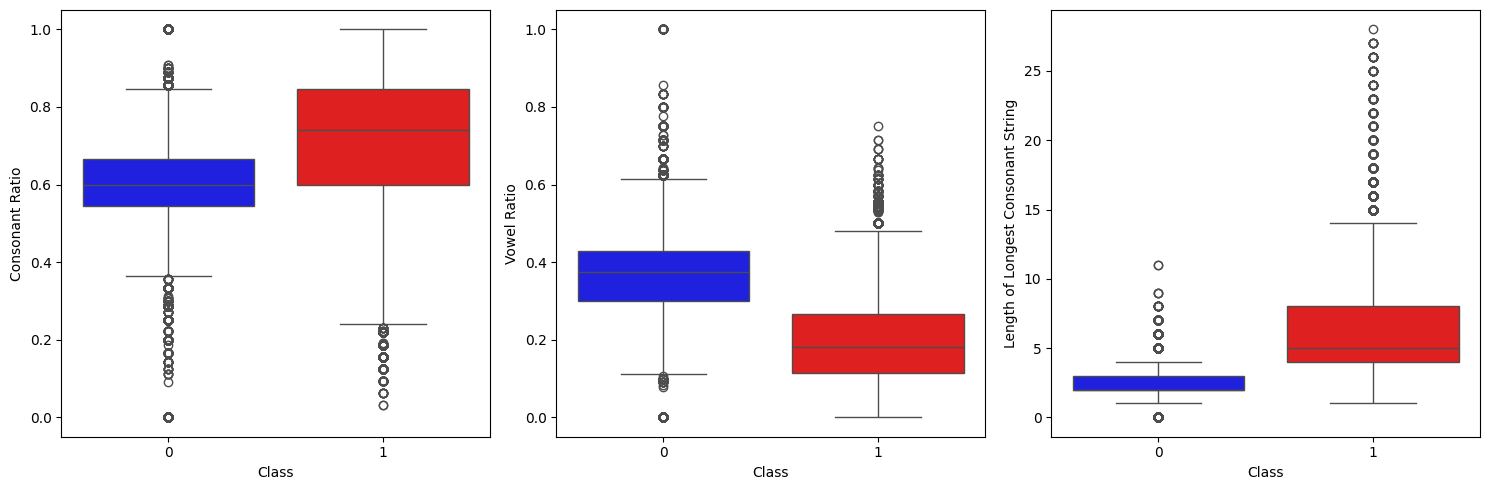

Fig. 3. Box plots for comparing consonant ratio, vowel ratio, and length of longest consonant string with the target


In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df_final, x='isDGA', y='consonant_ratio', hue='isDGA', ax=axes[0], palette=['blue', 'red'], legend=False)
sns.boxplot(data=df_final, x='isDGA', y='vowel_ratio', hue='isDGA', ax=axes[1], palette=['blue', 'red'], legend=False)
sns.boxplot(data=df_final, x='isDGA', y='long_consonant_str', hue='isDGA', ax=axes[2], palette=['blue', 'red'], legend=False)

for ax in axes:
    ax.set_xlabel('Class')
    ax.set_ylabel('')

axes[0].set_ylabel('Consonant Ratio')
axes[1].set_ylabel('Vowel Ratio')
axes[2].set_ylabel('Length of Longest Consonant String')

plt.tight_layout()
plt.show()
print("Fig. 3. Box plots for comparing consonant ratio, vowel ratio, and length of longest consonant string with the target")

<div class="alert alert-block alert-info">
In addition to differences in domain name length and the number of unique characters, in <b>Figure 3</b> further analysis reveals distinctive patterns in the composition of DGA domains compared to legitimate ones. Specifically, DGA domains exhibit notable variations in the ratio of consonants to vowels, the length of consonant strings, and the overall proportion of vowels. Firstly, DGA domains tend to have a higher ratio of consonants to vowels compared to legitimate domains. Conversely, DGA domains tend to exhibit lower vowel ratios compared to legitimate domains. This means that DGA-generated domain names contain consonant-heavy sequences and proportionally fewer vowel characters relative to consonants. Moreover, the analysis indicates that DGA domains feature longer strings of consecutive consonant characters.
</div>

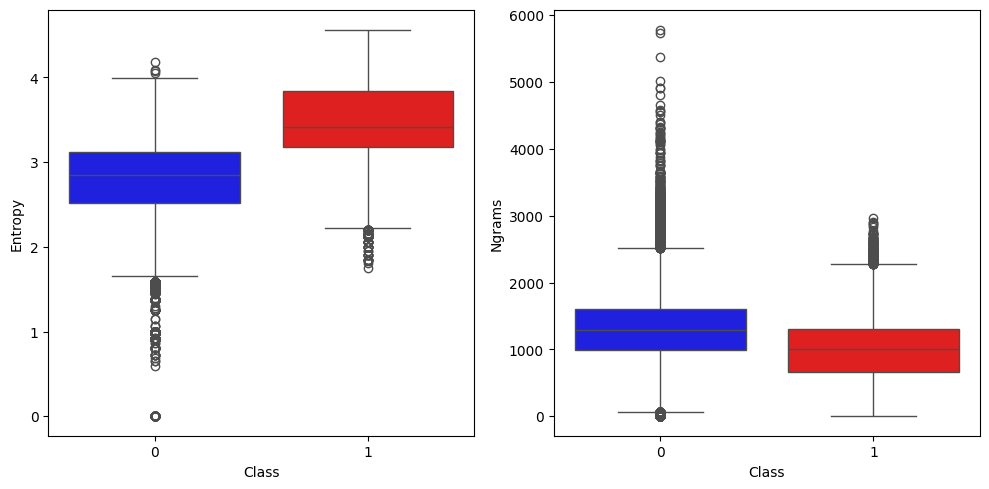

Fig. 4. Box plots for comparing entropy and ngrams with the target


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df_final, x='isDGA', y='entropy', hue='isDGA', ax=axes[0], palette=['blue', 'red'], legend=False)
sns.boxplot(data=df_final, x='isDGA', y='ngrams', hue='isDGA', ax=axes[1], palette=['blue', 'red'], legend=False)

axes[0].set_xlabel('Class')
axes[0].set_ylabel('Entropy')

axes[1].set_xlabel('Class')
axes[1].set_ylabel('Ngrams')

plt.tight_layout()
plt.show()
print("Fig. 4. Box plots for comparing entropy and ngrams with the target")

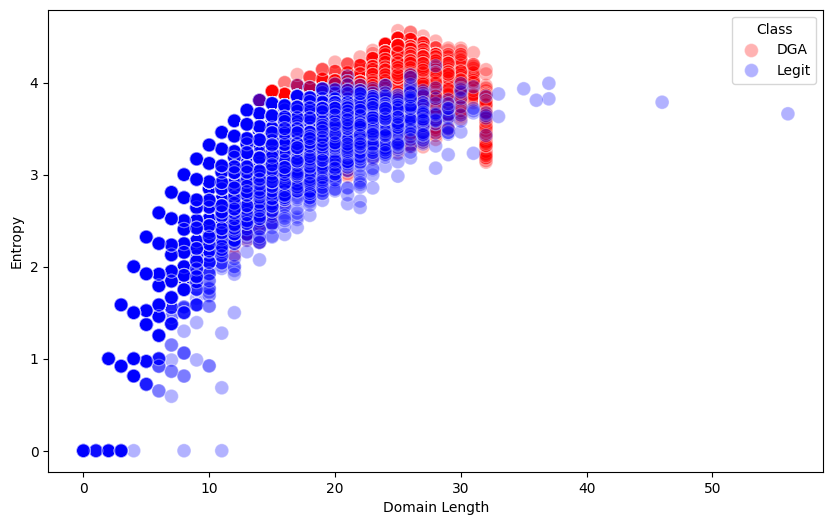

Fig. 5. Scatter plot for comparing domain length and entropy with the target


In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

palette = {1: 'red', 0: 'blue'}

sns.scatterplot(data=df_final, x='d_length', y='entropy', hue='isDGA', ax=ax, palette=palette, alpha=.3, s=100)
plt.ylabel('Entropy')
plt.xlabel('Domain Length')
plt.legend(title='Class', labels=['DGA', 'Legit'])
plt.show()
print("Fig. 5. Scatter plot for comparing domain length and entropy with the target")

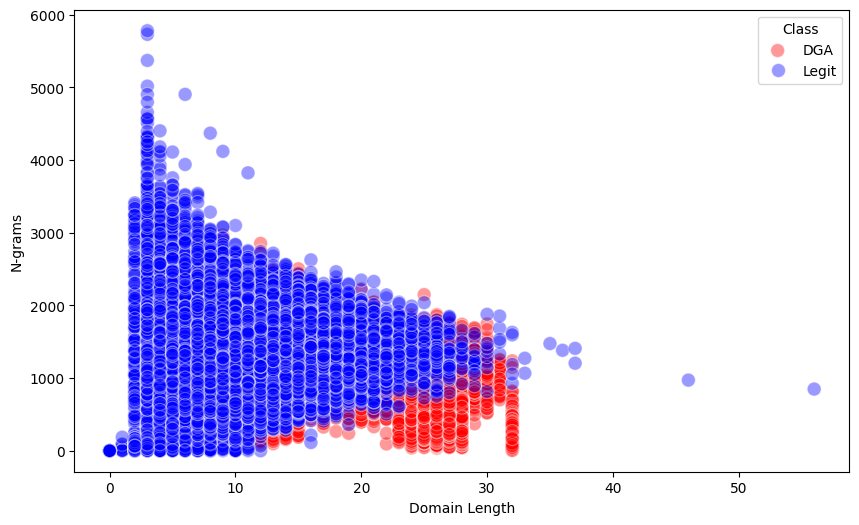

Fig. 6. Scatter plot for comparing domain length and n-grams with the target


In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
palette = {1: 'red', 0: 'blue'}
sns.scatterplot(data=df_final, x='d_length', y='ngrams', hue='isDGA', ax=ax, palette=palette, alpha=0.4, s=100)
plt.ylabel('N-grams')
plt.xlabel('Domain Length')
plt.legend(title='Class', labels=['DGA', 'Legit'])
plt.show()
print("Fig. 6. Scatter plot for comparing domain length and n-grams with the target")

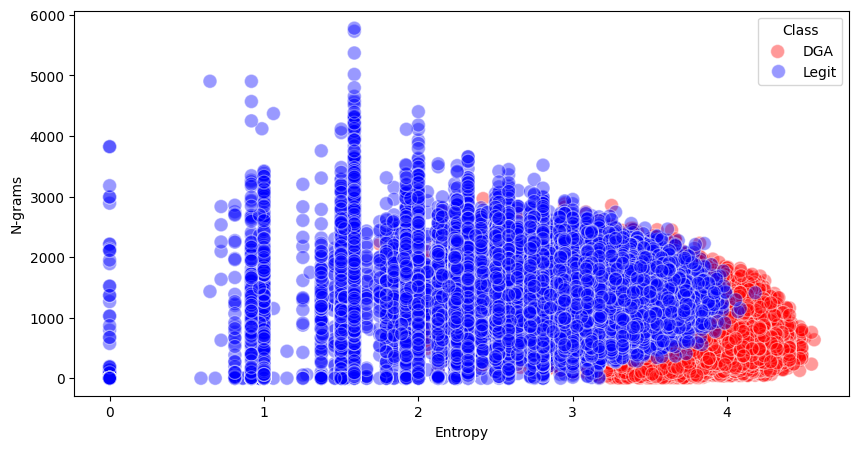

Fig. 7. Scatter plot for comparing entropy and n-grams with the target


In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
palette = {1: 'red', 0: 'blue'}
sns.scatterplot(data=df_final, x='entropy', y='ngrams', hue='isDGA', ax=ax, palette=palette, alpha=0.4, s=100)
plt.ylabel('N-grams')
plt.xlabel('Entropy')
plt.legend(title='Class', labels=['DGA', 'Legit'])
plt.show()
print("Fig. 7. Scatter plot for comparing entropy and n-grams with the target")

<div class="alert alert-block alert-info">
<b>Figs. 4, 5, 6</b> and <b>7</b> show the following:
<ul>
    <b><li>Entropy in legitimate domains:</b> Legitimate domains generally have lower entropy than DGA domains due to recognizable patterns and linguistic conventions. Factors influencing the entropy include common words or phrases, dictionary word usage, and adherence to industry-specific naming conventions.</li>
    <b><li>Entropy in DGA domains:</b> DGA domains have higher entropy values due to deliberate randomness introduced to evade detection. DGA algorithms maximize entropy by incorporating diverse character combinations and patterns. The high entropy results from algorithmic generation using pseudo-random number generators and seed values for varying complexity and randomness.</li>
    <b><li>N-Grams in legitimate domains:</b> Legitimate domains often display recognizable linguistic patterns, leading to common n-grams derived from commonly used words, phrases, and abbreviations. The frequency and distribution of n-grams follow established linguistic norms, with certain ones occurring more frequently due to specific word prevalence. Legitimate domains adhere to English language phonotactics, making words more pronounceable. Domains with fewer phoneme combinations are likely DGA-generated.</li>
    <b><li>N-Grams in DGA domains:</b> DGA domains lack recognizable linguistic patterns and show higher randomness in character sequences. This results in significantly lower frequency of common n-grams compared to legitimate domains. N-grams in DGA domains often comprise unusual character combinations not typical in legitimate domains.</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Outlier analysis:</b> After having reviewed the above analysis and taking account of domain-specific considerations, I decide to maintain them due to the following:
<ul>
    <li>Legitimate domains can exhibit a wide range of characteristics, including longer domain names or use a diverse range of characters for branding or marketing purpose, but do not necessarily imply malicious intent.</li>
    <li>Domains in languages other than English may have different naming conventions and character sets, leading to variations in domain length and unique character count. In the samples displayed above we see many domains in German which may naturally have a higher number of unique characters or letter (e.g., '<i><b>sparkasse-oberlausitz-niederschlesien</b></i>').</li>
</ul>

Therefore, outliers may represent rare but valid instances in the dataset so I ensure the model is exposed to these instances during training. Some models, such as Random Forest, are also less impacted by outliers. However, outliers can disproportionately influence model parameters and predictions, leading to poor generalization performance. 
</div>

<h4>B. Probability Density Function</h4>

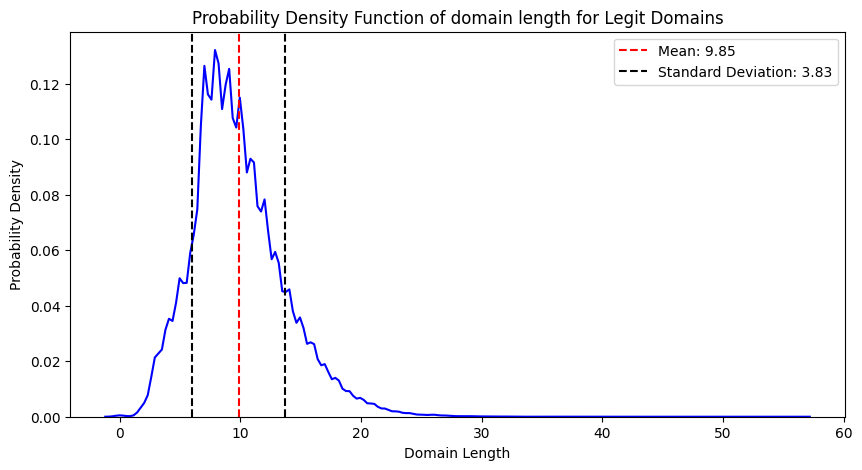

Fig. 8. Probability Density Function of domain length for Legit Domains


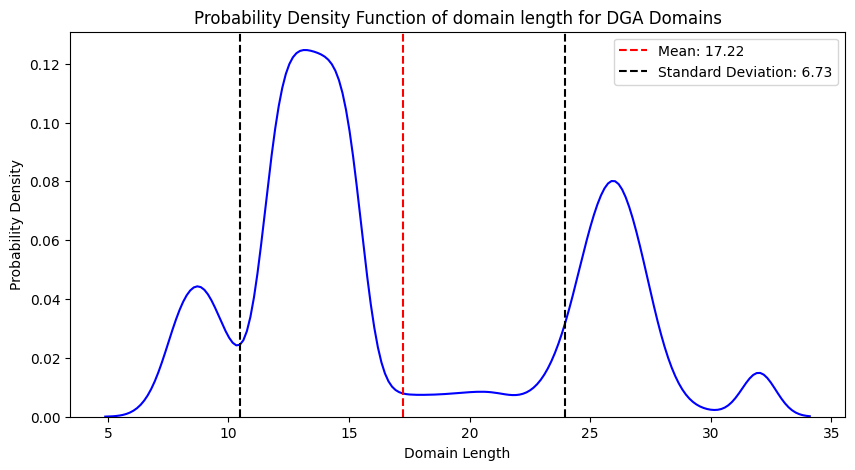

Fig. 9. Probability Density Function of domain length for DGA Domains


In [19]:
def plot_kde_with_stats(data, label, color):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.kdeplot(data, ax=ax, color=color)
    mean = data.mean()
    std = data.std()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='black', linestyle='--', label=f'Standard Deviation: {std:.2f}')
    plt.axvline(mean - std, color='black', linestyle='--')
    plt.title(f'Probability Density Function of domain length for {label} Domains')
    plt.xlabel('Domain Length')
    plt.ylabel('Probability Density')   
    plt.legend()
    plt.show()

plot_kde_with_stats(df_final[df_final['isDGA'] == 0]['d_length'], 'Legit', 'blue')
print("Fig. 8. Probability Density Function of domain length for Legit Domains")
plot_kde_with_stats(df_final[df_final['isDGA'] == 1]['d_length'], 'DGA', 'blue')
print("Fig. 9. Probability Density Function of domain length for DGA Domains")

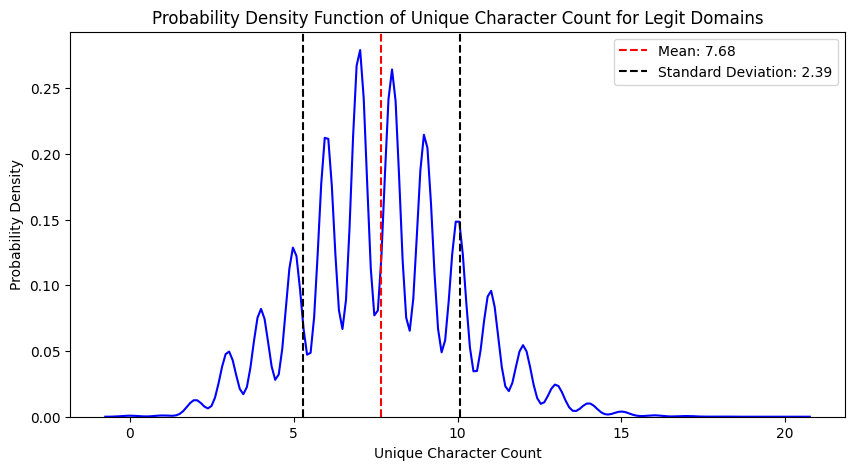

Fig. 10. Probability Density Function of unique character count for Legit Domains


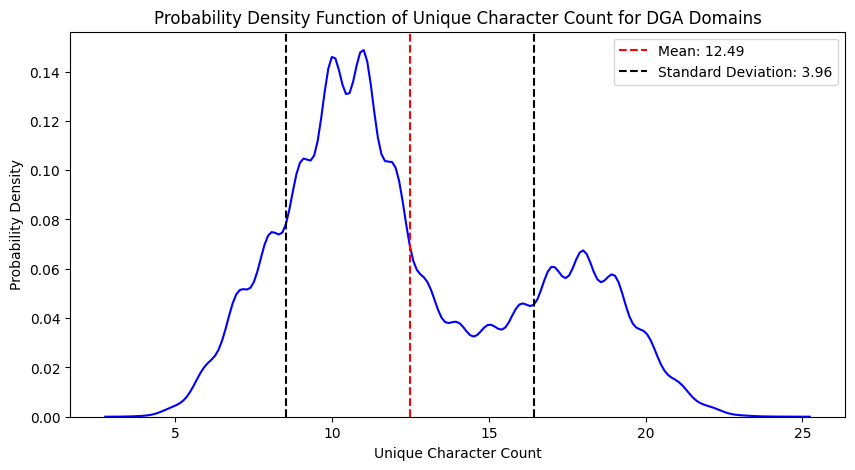

Fig. 11. Probability Density Function of unique character count for DGA Domains


In [20]:
def plot_kde_with_stats(data, label, color, feature_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.kdeplot(data, ax=ax, color=color)
    mean = data.mean()
    std = data.std()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='black', linestyle='--', label=f'Standard Deviation: {std:.2f}')
    plt.axvline(mean - std, color='black', linestyle='--')
    plt.title(f'Probability Density Function of {feature_name} for {label} Domains')
    plt.xlabel(feature_name)
    plt.ylabel('Probability Density')   
    plt.legend()
    plt.show()

plot_kde_with_stats(df_final[df_final['isDGA'] == 0]['unique_char_count'], 'Legit', 'blue', 'Unique Character Count')
print("Fig. 10. Probability Density Function of unique character count for Legit Domains")
plot_kde_with_stats(df_final[df_final['isDGA'] == 1]['unique_char_count'], 'DGA', 'blue', 'Unique Character Count')
print("Fig. 11. Probability Density Function of unique character count for DGA Domains")

<div class="alert alert-block alert-info">
<b>Figs 8, 9, 10 and 11</b> show the probability density function of the domain length and number of unique characters repectively for legitimate and DGA-generated domains. It can be seen that legitimate domains tend to have shorter domains names and fewer number of unique characters. This is expected since legitimate domains need to be easily memorable. However, DGA domains tend to be more random which results in higher number of unique characters and a wider distribution.
</div>

<h3>V. Feature Selection</h3>
<p>After conducting thorough data visualization and analysis, I can say I have identified several key features that exhibit significant relevance in distinguishing between legit domains and those DGA-generated. These features, listed below, demonstrate distinct patterns and characteristics that can aid in the classification task:
</p>

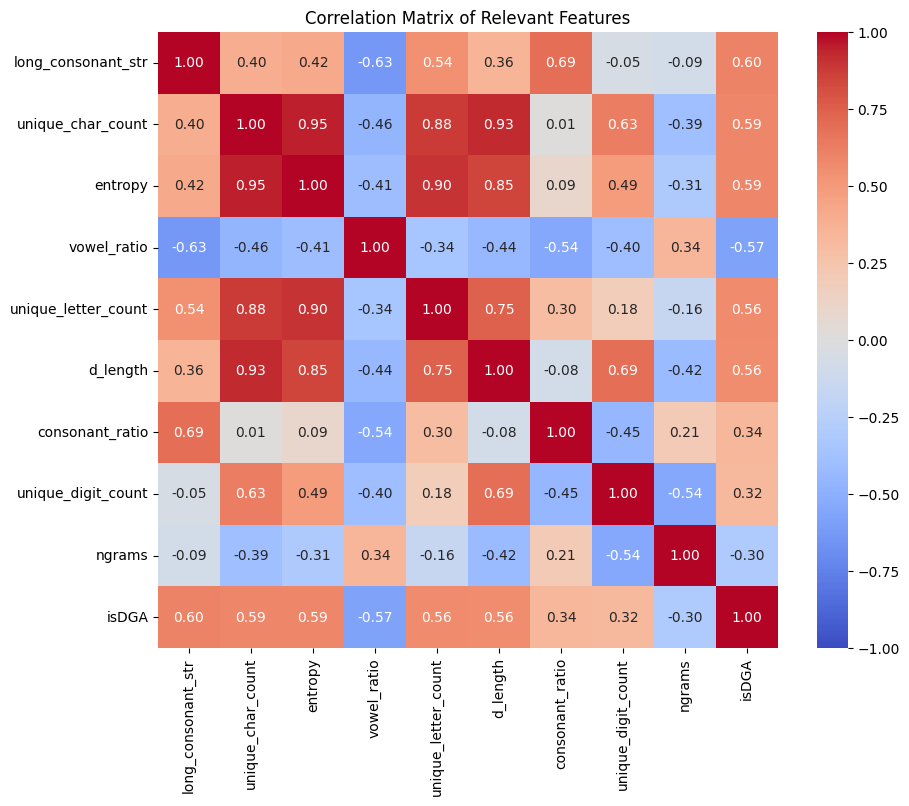

Fig. 12. Correlation matrix of relevant features


In [21]:
key_features = ['long_consonant_str', 'unique_char_count', 'entropy', 'vowel_ratio', 
                'unique_letter_count', 'd_length', 'consonant_ratio', 'unique_digit_count', 'ngrams']

correlation_matrix = df_final[key_features + ['isDGA']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Relevant Features')
plt.show()
print("Fig. 12. Correlation matrix of relevant features")

In [22]:
df_final.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/Final Project/Code/DGA-Detection-project2/data/processed/dga_features_final.csv', index=False)